In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# from google.colab import files
# uploaded = files.upload()

# #raw_data = pd.read_csv("Elon_musk.csv",encoding= 'unicode_escape')
# #raw_data = pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")
# raw_data = pd.read_csv("Elon_musk.csv",encoding = "Latin-1")

# raw_data.head()

In [3]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/srikarthadaka/data_science/main/text_mining/Elon_musk.csv", encoding = "Latin1")
raw_data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
raw_data.drop(['Unnamed: 0'],inplace=True,axis=1)
raw_data.rename({'Text':'Tweets'},axis=1,inplace=True)
raw_data.head()

,Tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [5]:
text_total = " ".join(raw_data["Tweets"])
text_total[:1000]

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [6]:
chars = sorted(list(set(text_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_abcdefghijklmnopqrstuvwxyz~ Ðßàäèéöøü
107


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [8]:
raw_data.isnull().sum()

Tweets    0
dtype: int64

In [9]:
data = raw_data.copy()

In [10]:
import re #regular expression
import string

def cleaning_text(text):

      text = re.sub('U+0001F923', "", text)
      text = re.sub('U+0001F3B6', "", text)
      text = re.sub('U+0001F5A4', "", text)
      text = re.sub('@[\w]*', " ", text)
      text = re.sub('https?://\S+|www\.\S+', " ", text)
      text = re.sub('\n',  " ", text)
      text = re.sub("ß", "b", text)
      text = re.sub("ð", "o", text)
      text = re.sub("ö", "o", text)
      text = re.sub("ø", "o", text)
      text = re.sub("ü", "u", text)
      text = re.sub("à", "a", text)
      text = re.sub("ä", "a", text)
      text = re.sub("è", "e", text)
      text = re.sub("é", "e", text)
      text = re.sub('', "", text)
      text = re.sub('', "", text)
      text = re.sub('\[.*?\]', '', text)
      text = re.sub('https?://\S+|www\.\S+', '', text)
      text = re.sub('<.*?>+', '', text)
      text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
      text = re.sub('\w*\d\w*', '', text)
      text = re.sub('@[\w]*', '', text)
      text = re.sub("[0-9" "]+"," ",text)
      text = re.sub('[‘’“”…]', '', text)
 
      return text

cleaning = lambda x: cleaning_text(x)

def clean_text(text):

      text = text.lower()
      text = re.sub(r'[^\w\s]'," ", text)
      
      return text

clean = lambda x: clean_text(x)

In [11]:
data['Cleaned_Tweets'] = data.Tweets.apply(cleaning)
data.head(20)

,Tweets,Cleaned_Tweets
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is nextlev...
2,@joerogan @Spotify Great interview!,Great interview
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing exec...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox
6,"Frodo was the underdoge,\nAll thought he would...",Frodo was the underdoge All thought he would f...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed Tweets definitely do not represent ...
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [12]:
data['Cleaned_Tweets'] = data.Cleaned_Tweets.apply(clean)
data.head(5)

,Tweets,Cleaned_Tweets
0,@kunalb11 Im an alien,i m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlev...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing exec...


In [13]:
clean_total = " ".join(data["Cleaned_Tweets"])
chars = sorted(list(set(clean_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 abcdefghijklmnopqrstuvwxyz ð
29


In [14]:
data = data[data['Cleaned_Tweets']!='']
data.head(10)

,Tweets,Cleaned_Tweets
0,@kunalb11 Im an alien,i m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlev...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing exec...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent ...
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [15]:
from textblob import TextBlob
data['Cleaned_Tweets'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                         i m an alien
1      ray tracing on cyberpunk with her is nextlev...
2                                      great interview
3                               done is underestimated
4      congratulations tell china for amazing execu...
Name: Cleaned_Tweets, dtype: object

In [16]:
data.shape

(1995, 2)

In [17]:
data.drop_duplicates(subset=['Cleaned_Tweets'], keep=False)
data.shape

(1995, 2)

In [18]:
#Word frequency
freq = pd.Series(' '.join(data['Cleaned_Tweets']).split()).value_counts()[:20] # for top 20
freq

the     487
to      400
a       357
is      356
of      315
in      219
amp     218
it      194
for     194
we      172
will    165
s       163
be      157
that    148
this    140
i       137
on      129
rt      127
but     126
with    108
dtype: int64

In [19]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [20]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Cleaned_Tweets'] = data['Cleaned_Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data

,Tweets,Cleaned_Tweets
0,@kunalb11 Im an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amazing execution ...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",true sounds surreal negative propaganda still ...
1995,@PPathole Make sure to read ur terms &amp; con...,make sure read ur terms amp conditions clickin...
1996,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber


In [21]:
TextBlob(data['Cleaned_Tweets'][3]).ngrams(1)

[WordList(['doge']), WordList(['underestimated'])]

In [22]:
TextBlob(data['Cleaned_Tweets'][4]).ngrams(5)

[WordList(['congratulations', 'tesla', 'china', 'amazing', 'execution']),
 WordList(['tesla', 'china', 'amazing', 'execution', 'last']),
 WordList(['china', 'amazing', 'execution', 'last', 'year']),
 WordList(['amazing', 'execution', 'last', 'year', 'next']),
 WordList(['execution', 'last', 'year', 'next', 'even'])]

In [23]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['Cleaned_Tweets']).split()).value_counts()[:20] # for top 20
freq_Sw

amp         218
rt          127
tesla        96
yes          86
great        76
haha         55
good         51
launch       49
sure         43
would        41
yeah         41
much         40
dragon       39
first        39
one          39
like         38
spacex       35
true         35
probably     35
make         33
dtype: int64

In [24]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["Cleaned_Tweets"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
print(word_freq_df.sort_values('occurrences',ascending = False).head())

       term  occurrences  frequency
126     amp          218   0.021765
2697     rt          127   0.012680
3193  tesla           96   0.009585
3621    yes           86   0.008586
1361  great           76   0.007588


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Cleaned_Tweets"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df.head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,abort,absolutely,absurd,acceptable,access,accurate,achieve,active,actual,...,ya,yeah,year,years,yes,yesterday,yup,zero,zeroes,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.404265,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.526381,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [27]:
top2_words = get_top_n2_words(data["Cleaned_Tweets"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt falcon,17
1,crew dragon,13
2,pretty much,12
3,giga berlin,11
4,first stage,10


[Text(0, 0, 'rt falcon'),
 Text(0, 0, 'crew dragon'),
 Text(0, 0, 'pretty much'),
 Text(0, 0, 'giga berlin'),
 Text(0, 0, 'first stage'),
 Text(0, 0, 'falcon first'),
 Text(0, 0, 'next week'),
 Text(0, 0, 'coming soon'),
 Text(0, 0, 'static fire'),
 Text(0, 0, 'next year'),
 Text(0, 0, 'falcon launch'),
 Text(0, 0, 'great game'),
 Text(0, 0, 'next month'),
 Text(0, 0, 'course still'),
 Text(0, 0, 'still love'),
 Text(0, 0, 'one day'),
 Text(0, 0, 'first operational'),
 Text(0, 0, 'stage landed'),
 Text(0, 0, 'rt liftoff'),
 Text(0, 0, 'good point')]

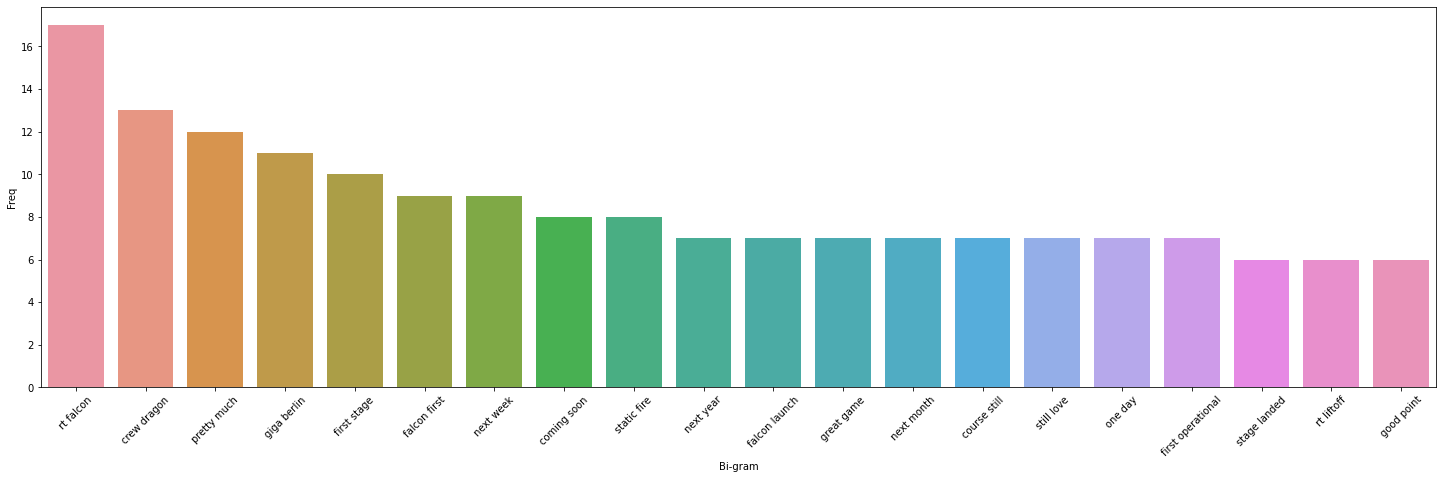

In [28]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [29]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [30]:
top3_words = get_top_n3_words(data["Cleaned_Tweets"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,falcon first stage,9
1,rt falcon first,8
2,course still love,7
3,first stage landed,6
4,still love droneship,5
...,...,...
195,passed initial pressure,1
196,marvin martian helm,1
197,martian helm dog,1
198,public hamstring starlink,1


[Text(0, 0, 'falcon first stage'),
 Text(0, 0, 'rt falcon first'),
 Text(0, 0, 'course still love'),
 Text(0, 0, 'first stage landed'),
 Text(0, 0, 'still love droneship'),
 Text(0, 0, 'dragon first operational'),
 Text(0, 0, 'first operational mission'),
 Text(0, 0, 'rt falcon launches'),
 Text(0, 0, 'landed course still'),
 Text(0, 0, 'crew dragon first'),
 Text(0, 0, 'entertaining outcome likely'),
 Text(0, 0, 'falcon launches starlink'),
 Text(0, 0, 'rt watch falcon'),
 Text(0, 0, 'watch falcon launch'),
 Text(0, 0, 'stage landed course'),
 Text(0, 0, 'rt crew dragon'),
 Text(0, 0, 'heard name years'),
 Text(0, 0, 'rt falcon launch'),
 Text(0, 0, 'launches starlink satellites'),
 Text(0, 0, 'starlink satellites orbit')]

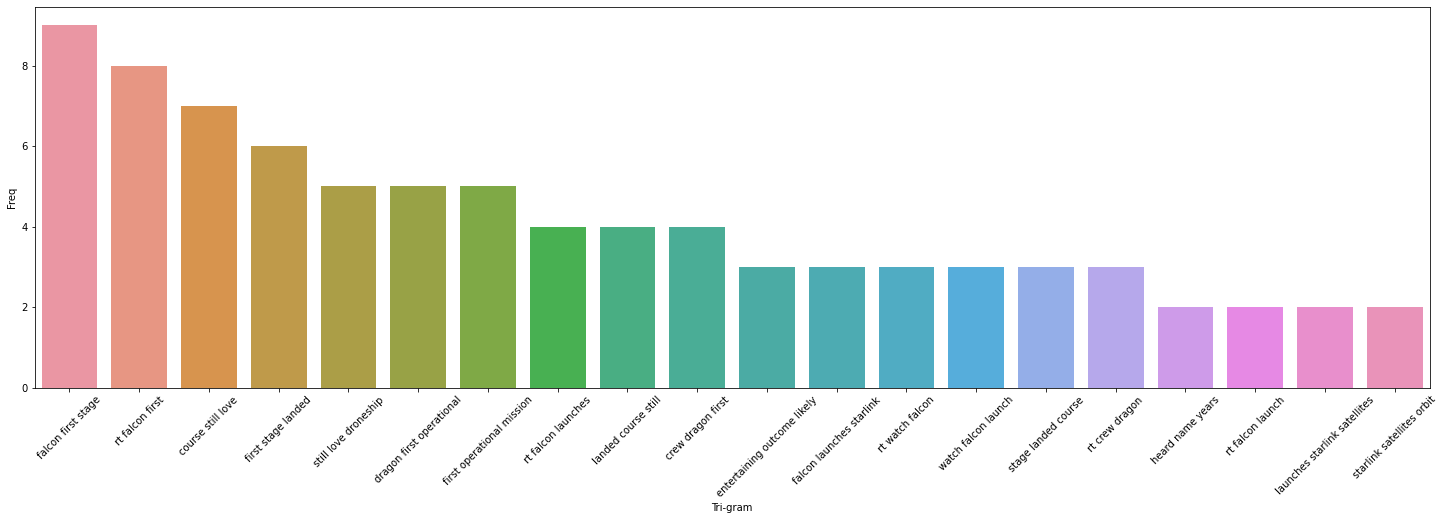

In [31]:
#Tri-gram plot
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [32]:
string_total = " ".join(data["Cleaned_Tweets"])
string_total[:2000]

'alien ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail haha thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse  getting real bought dogecoin lil x toddler hodler definitely issues sentencing seems bit high thanks fixing please unlock account  true power haha crypto wallet give private keys avoided costs app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical amp economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g meant price countries difference taxes amp shipping intended earth may ideas apply mars  xprize team manage carbon captu

(-0.5, 1799.5, 1499.5, -0.5)

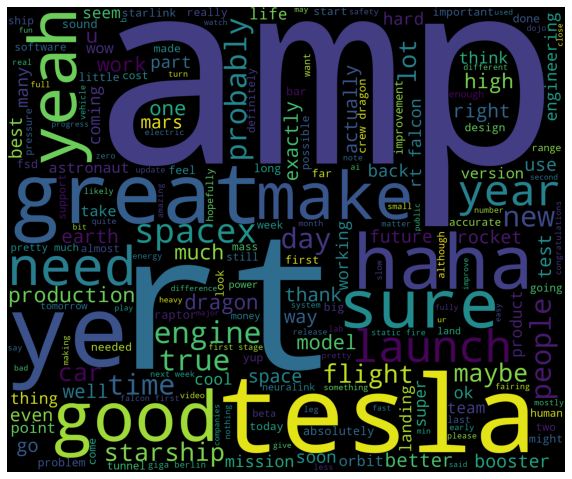

In [43]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_total)
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud_stw)
plt.axis('off')

In [34]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'

In [35]:
fetch_sentiment_using_textblob = data.Cleaned_Tweets.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(fetch_sentiment_using_textblob.value_counts())

,Cleaned_Tweets
positive,1795
negative,200


In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [37]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(data.Cleaned_Tweets[3])

{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.2732}

In [38]:
df_score=pd.DataFrame()
df_score['Cleaned_Tweets'] = data.Cleaned_Tweets
df_score['scores'] = data['Cleaned_Tweets'].apply(lambda review: sid.polarity_scores(review))
df_score['compound']  = df_score['scores'].apply(lambda scores: scores['compound'])
df_score['sentiment'] = df_score['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df_score.head(10)

,Cleaned_Tweets,scores,compound,sentiment
0,alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,Positive
3,doge underestimated,"{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'comp...",-0.2732,Negative
4,congratulations tesla china amazing execution ...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.8271,Positive
5,happy new year ox,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.5719,Positive
6,frodo underdoge thought would fail,"{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'comp...",-0.5423,Negative
7,haha thanks,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.7096,Positive
8,indeed tweets definitely represent realworld t...,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.4019,Positive
9,entertaining outcome likely,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,Positive


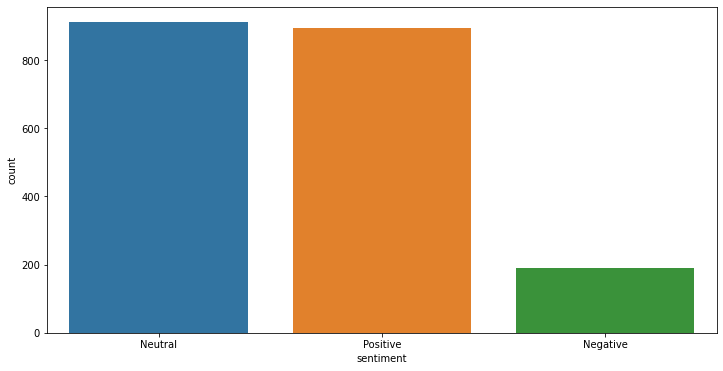

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df_score)

In [40]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [50]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df_score['Cleaned_Tweets'])

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df_score['sentiment'], test_size=0.25, random_state=7)

In [51]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score*100)

Accuracuy Score:  75.35070140280561
